# Convolutional Neural Network

## Qu'est-ce que la convolution?

- Elle est une operation lineiare qui filtrer une image. (Image Processing)
- La reponse a un pixel d'une filter est un mesure du similarité entre le structure locale de la image et le structure de filtre kernel convolutional. (Pattern Matching)
- Une image peut etre expresser par une combination de filtre kernels qui ont des tailles et des structures differentes (Wavelet Analysis)

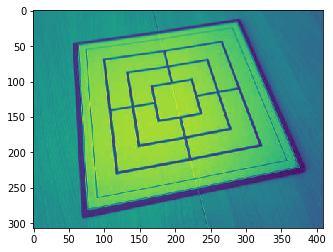

In [9]:
import skimage.io as io

image = io.imread('board1.png', as_gray=True)
plt.imshow(image)

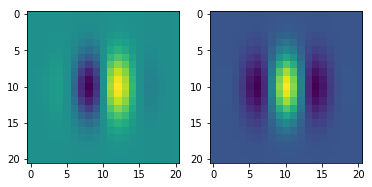

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skimage.filters import gabor_kernel

edge_kernel = np.imag(gabor_kernel(0.1, 0, 2))
line_kernel = np.real(gabor_kernel(0.1, 0, 2))
line_kernel -= np.mean(line_kernel)
plt.subplot(1,2,1)
plt.imshow(edge_kernel)
plt.subplot(1,2,2)
plt.imshow(line_kernel)

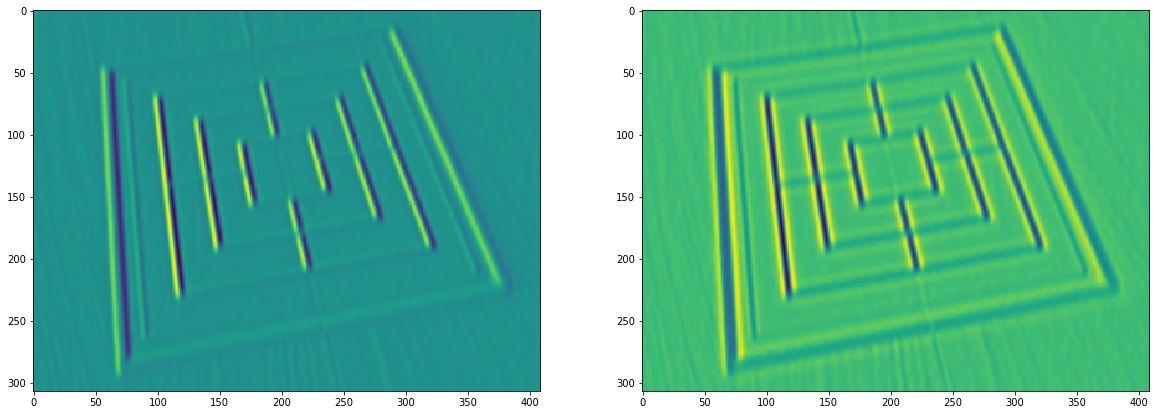

In [20]:
from scipy import ndimage as ndi

edge_filtered = ndi.convolve(image, edge_kernel)
line_filtered = ndi.convolve(image, line_kernel)
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(edge_filtered)
plt.subplot(1,2,2)
plt.imshow(line_filtered)

## Convolution in Tensorflow

On peut realiser la convolution dans Tensorflow

- les kernels ont la forme [width, height, depth, number of kernels]
- les images ont la forme [number of images, width, height, depth]

- Pour les placeholders, on peut ecrire "None" si une dimension peut changer, par exemple, les nombre des images

### Creer le placeholder de l'image

In [29]:
import tensorflow as tf

sess = tf.InteractiveSession()

# Image input
x_input = tf.placeholder(tf.float32, shape=[None,image.shape[0],image.shape[1],1])

/Users/chaos/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### Creer l'image

- ajouter un axe plus en utilisee np.newaxis

In [31]:
print("image shape is {}".format(image.shape))
image_4d = image[np.newaxis,:,:,np.newaxis]
print("image_4d shape is {}".format(image_4d.shape))

image shape is (307, 409)
image_4d shape is (1, 307, 409, 1)


### Creer le variable des kernels

Noter: 
- python list ajoutement: (3,4) + (1,2) = (3,4,1,2)
- python indexing est base-zero


In [25]:
# Kernel
print("kernel_4d shape is {}".format(edge_kernel.shape + (1,2)))
kernel_4d = np.zeros(edge_kernel.shape + (1,2))
kernel_4d[:,:,0,0] = edge_kernel
kernel_4d[:,:,0,1] = line_kernel
filter_var = tf.Variable(initial_value=kernel_4d, dtype=tf.float32)

Shape is (21, 21, 1, 2)


Output is two images, size is (1, 307, 409, 2)


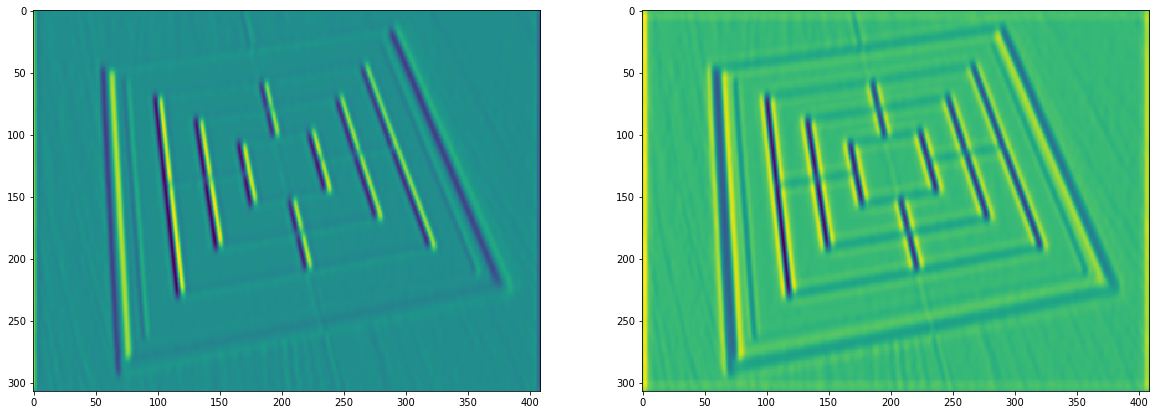

In [33]:
# Convolution
conv = tf.nn.conv2d(x_input, filter_var, strides=[1,1,1,1], padding="SAME")

# Initialise the variables
sess.run(tf.global_variables_initializer())

# Feed in an image and get the results
result = sess.run(conv, feed_dict={x_input: image_4d})

print("Output is two images, size is {}".format(result.shape))

fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(result[0,:,:,0])
plt.subplot(1,2,2)
plt.imshow(result[0,:,:,1])